# Trajectory estimation

For this example, we will show how one can estimate a trajectory between points in the grid and visualize the resulting path.
For this, we illustrate how the ```SpatialModel```, ```KinematicModel```, ```TimingModel``` and ```RobotVisualizer``` classes are used together.

In [1]:
import models.robot_visualizer.robot_visualizer as rv
import models.spatial_model.spatial_model as sm
import models.kinematic_model.kinematic_model as km
import models.timing_model.timing_model as tm

In [2]:
# initialize the models
spatial_model = sm.SpatialModel()
kinematic_model = km.KinematicModel()
timing_model = tm.TimingModel()
robot_visualizer = rv.RobotVisualizer()

## Obtain spatial poses

We wish to move the robot from the grid point $P_1 = (1,1)$ to the grid point $P_2 = (10,-6)$. We begin by using the ```SpatialModel``` class to obtain the spatial poses of these points.


In [3]:
spatial_pose_1 = spatial_model.compute_spatial_pose(1,1)
spatial_pose_2 = spatial_model.compute_spatial_pose(10,-6)
print(f"spatial_pose_1: {spatial_pose_1}")
print(f"spatial_pose_2: {spatial_pose_2}")

spatial_pose_1: [-0.08051, 0.32071, 0.185, 0, 3.141592653589793, 0]
spatial_pose_2: [0.27949, 0.040710000000000024, 0.185, 0, 3.141592653589793, 0]


## Use inverse kinematics to obtain the joint positions

Next, we use the ```KinematicModel``` class to obtain the joint positions that correspond to the spatial poses of the points $P_1$ and $P_2$. 

In [4]:
joint_pos_start = kinematic_model.compute_inverse_kinematics(spatial_pose_1)
joint_pos_end = kinematic_model.compute_inverse_kinematics(spatial_pose_2)
print(f"joint_pos_start: {joint_pos_start}")
print(f"joint_pos_end: {joint_pos_end}")

joint_pos_start: [ 4.55083016 -1.41069311  1.98144901 -2.14155223 -1.57079633  2.98003383]
joint_pos_end: [ 2.80373593 -1.62314298  2.2094885  -2.15714185 -1.57079635  1.23293961]


## Use Timing Model to estimate duration between joint positions
The trajectories are estimated time-fixed which necessitates estimation of durations between joint positions. For this we will utilize the timing model.

In [5]:
t = timing_model.compute_duration_between_jps(joint_pos_start, joint_pos_end)
print(f"t: {t}")

t: 2.418352091804845


## Use trajectory generation to obtain the trajectory

Here the estimated duration ```t``` will be used.

In [6]:
trajectory = kinematic_model.compute_trajectory(joint_pos_start, joint_pos_end, t)
print(f"trajectory: {trajectory}")

trajectory: Trajectory created by jtraj: 48 time steps x 6 axes


## Visualize the trajectory

We visualize the trajectory using the ```RobotVisualizer``` class.

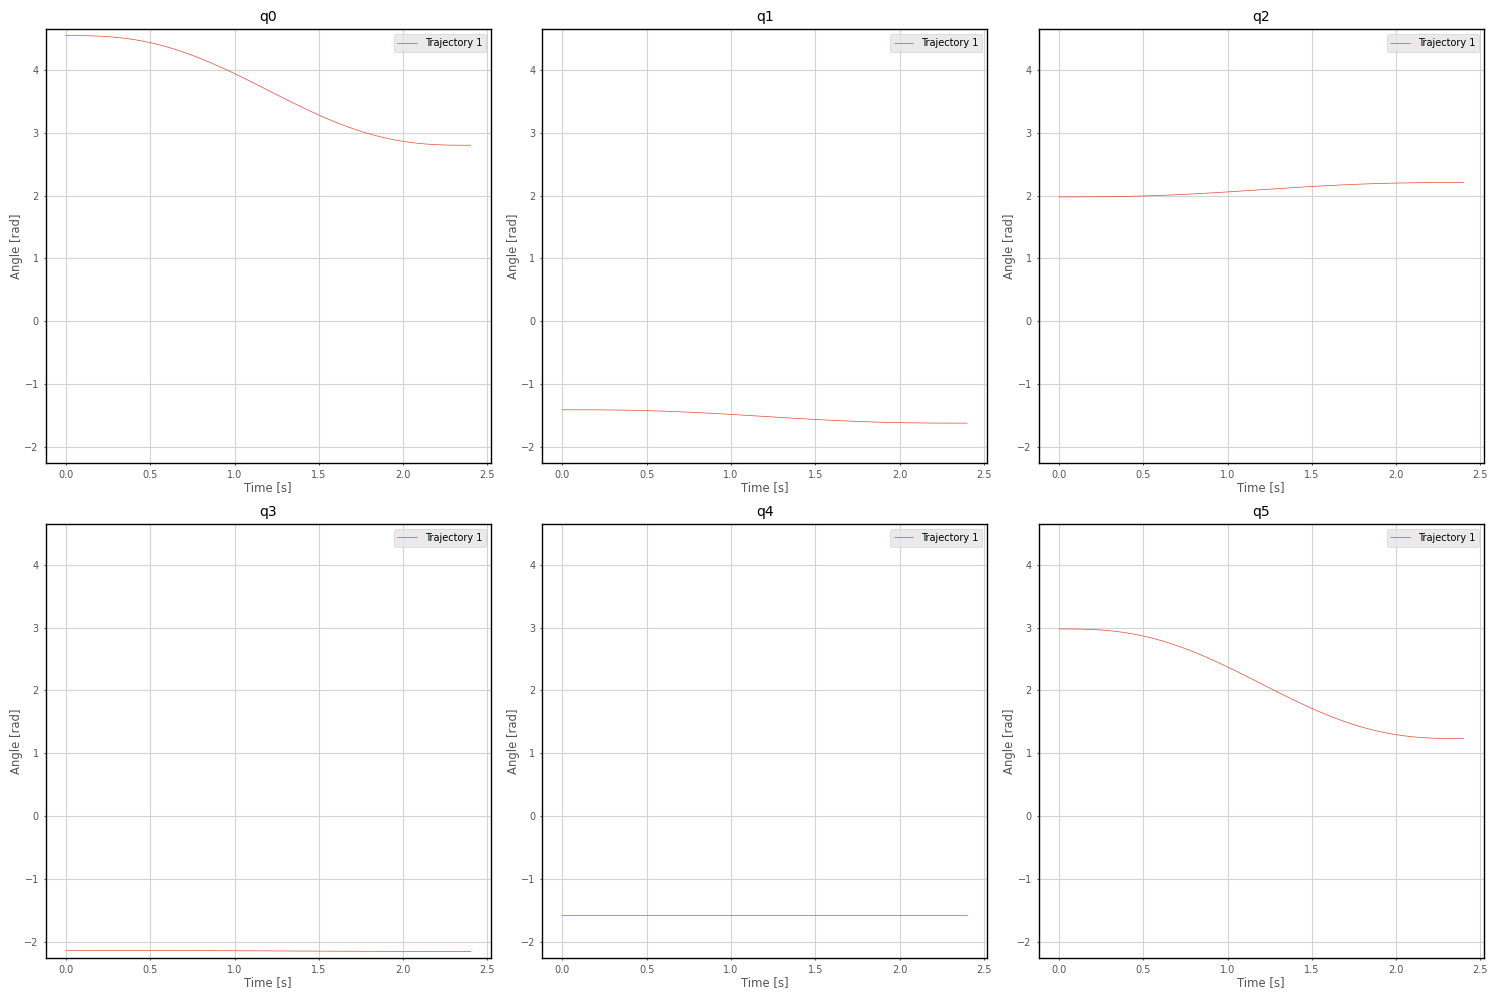

In [7]:
robot_visualizer.plot_trajectory_2d(trajectory)

You can also use the ```RobotVisualizer``` class to visualize the robot in a 3D environment as shown below.

In [8]:
robot_visualizer.start_application()

Visualization Application Started


Remember to input the port number!

In [9]:
robot_visualizer.visualize_trajectory(trajectory.q)

Visualizing position [47/47]																																														

In [10]:
robot_visualizer.stop_visualization()

Stopping Visualization


## Trajectory between multiple points 

We can also easily obtain the trajectory between multiple points in the grid using a similar approach. We use the ```z_G``` and ```wrist_rotation``` parameters to see some movement in more than one joint.

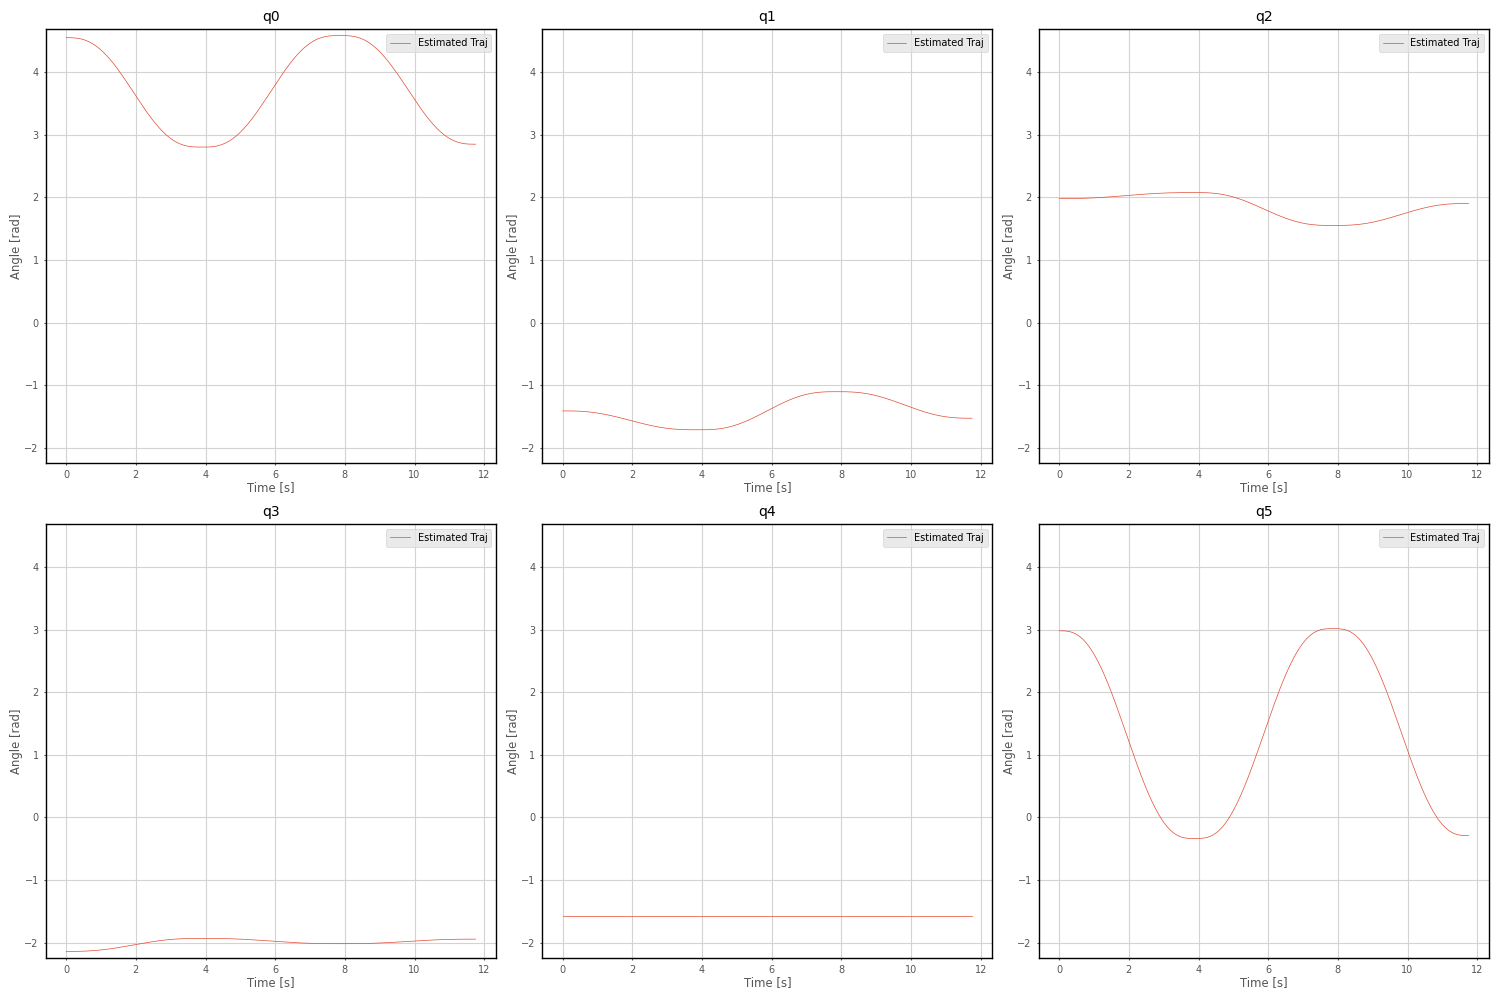

In [11]:
import numpy as np

# compute the spatial poses
p1 = spatial_model.compute_spatial_pose(1, 1, 0)
p2 = spatial_model.compute_spatial_pose(10, -6, 1)
p3 = spatial_model.compute_spatial_pose(1, 3, 0)
p4 = spatial_model.compute_spatial_pose(11, -6, 1)

# compute the joint positions
j1 = kinematic_model.compute_inverse_kinematics(p1)
j2 = kinematic_model.compute_inverse_kinematics(p2, wrist_rotation=np.pi/2)
j3 = kinematic_model.compute_inverse_kinematics(p3)
j4 = kinematic_model.compute_inverse_kinematics(p4, wrist_rotation=np.pi/2)

# compute the trajectories
t1 = kinematic_model.compute_trajectory(
    j1, j2, timing_model.compute_duration_between_jps(j1, j2)
)
t2 = kinematic_model.compute_trajectory(
    j2, j3, timing_model.compute_duration_between_jps(j2, j3)
)
t3 = kinematic_model.compute_trajectory(
    j3, j4, timing_model.compute_duration_between_jps(j3, j4)
)

# concatenate the trajectories
full_traj = np.concatenate((t1.q, t2.q, t3.q), axis=0)

# plot the trajectory
robot_visualizer.plot_trajectory_2d(full_traj, labels="Estimated Traj")